In [1]:
import pandas as p
import numpy as n
import matplotlib.pyplot as m
import seaborn as s

In [2]:
d=p.read_csv('cars-+K+men.csv')
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    object 
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_name  398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [3]:
print('horsepower cannot be object datatype as it would mean it contains non numerical values which is practically impossible and may be a mistake while entering the data')

horsepower cannot be object datatype as it would mean it contains non numerical values which is practically impossible and may be a mistake while entering the data


In [4]:
d=d.replace('?',n.nan)
# d=d[d.hp.apply(lambda x: x.isnumeric())] 
d[['hp']]=d[['hp']].astype('float64')

In [5]:
d.shape

(398, 9)

In [6]:
print('there may be curse of dimensionality as 392 data points may not be to include all possible combinations of 8 attributes')

there may be curse of dimensionality as 392 data points may not be to include all possible combinations of 8 attributes


In [7]:
d.dtypes

mpg         float64
cyl           int64
disp        float64
hp          float64
wt            int64
acc         float64
yr            int64
origin        int64
car_name     object
dtype: object

In [8]:
nu=d.drop('car_name',axis=1)
c=d['car_name']
nu=nu.apply(lambda x:x.fillna(x.median()),axis=0)
d=nu.join(c)

In [9]:
d.isnull().any()

mpg         False
cyl         False
disp        False
hp          False
wt          False
acc         False
yr          False
origin      False
car_name    False
dtype: bool

In [10]:
print('no missing values')

no missing values


In [11]:
d['cyl'].value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cyl, dtype: int64

In [12]:
d['yr'].value_counts()

73    40
78    36
76    34
82    31
75    30
81    29
80    29
79    29
70    29
77    28
72    28
71    28
74    27
Name: yr, dtype: int64

In [13]:
d['origin'].value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

In [14]:
d.describe()

,mpg,cyl,disp,hp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [15]:
print('there are no negative values and from max values and data types & domain knowledge it can be conluded there are no wrong values')

there are no negative values and from max values and data types & domain knowledge it can be conluded there are no wrong values


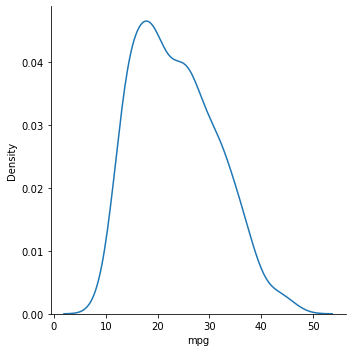

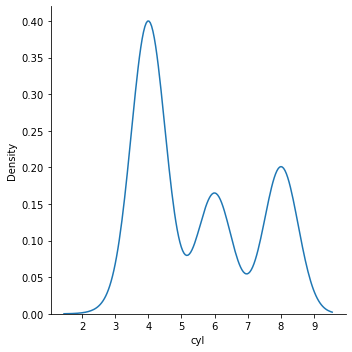

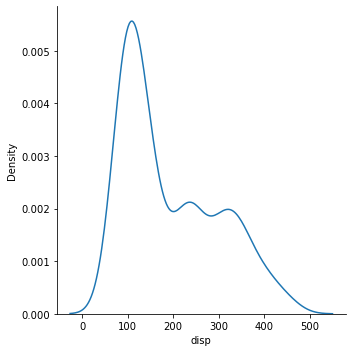

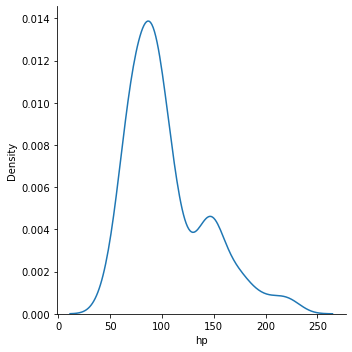

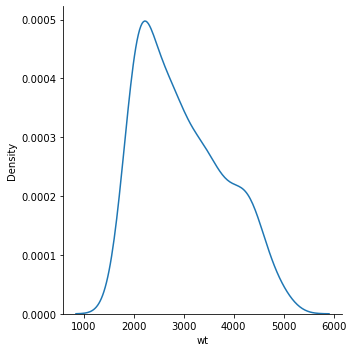

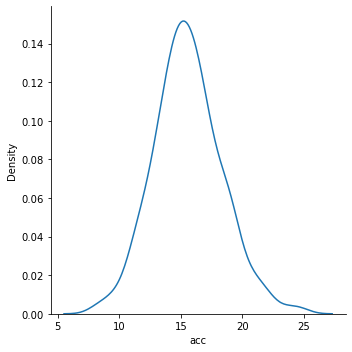

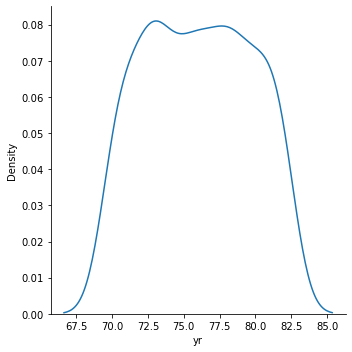

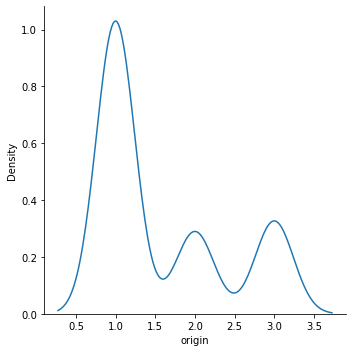

In [16]:
for i in range (0,len(d.columns.to_list())-1):
    s.displot(d[d.columns[i]],kind='kde')

In [17]:
d.corr()

,mpg,cyl,disp,hp,wt,acc,yr,origin
mpg,1.000000,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267,0.563450
cyl,-0.775396,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746,-0.562543
disp,-0.804203,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.370164,-0.609409
hp,-0.773453,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733,-0.452096
wt,-0.831741,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.306564,-0.581024
acc,0.420289,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137,0.205873
yr,0.579267,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.452096,-0.581024,0.205873,0.180662,1.000000


<AxesSubplot:>

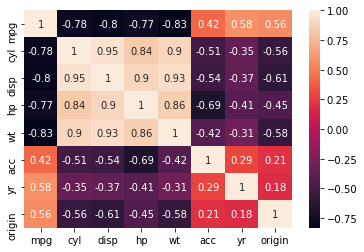

In [18]:
s.heatmap(d.corr(),annot=True)

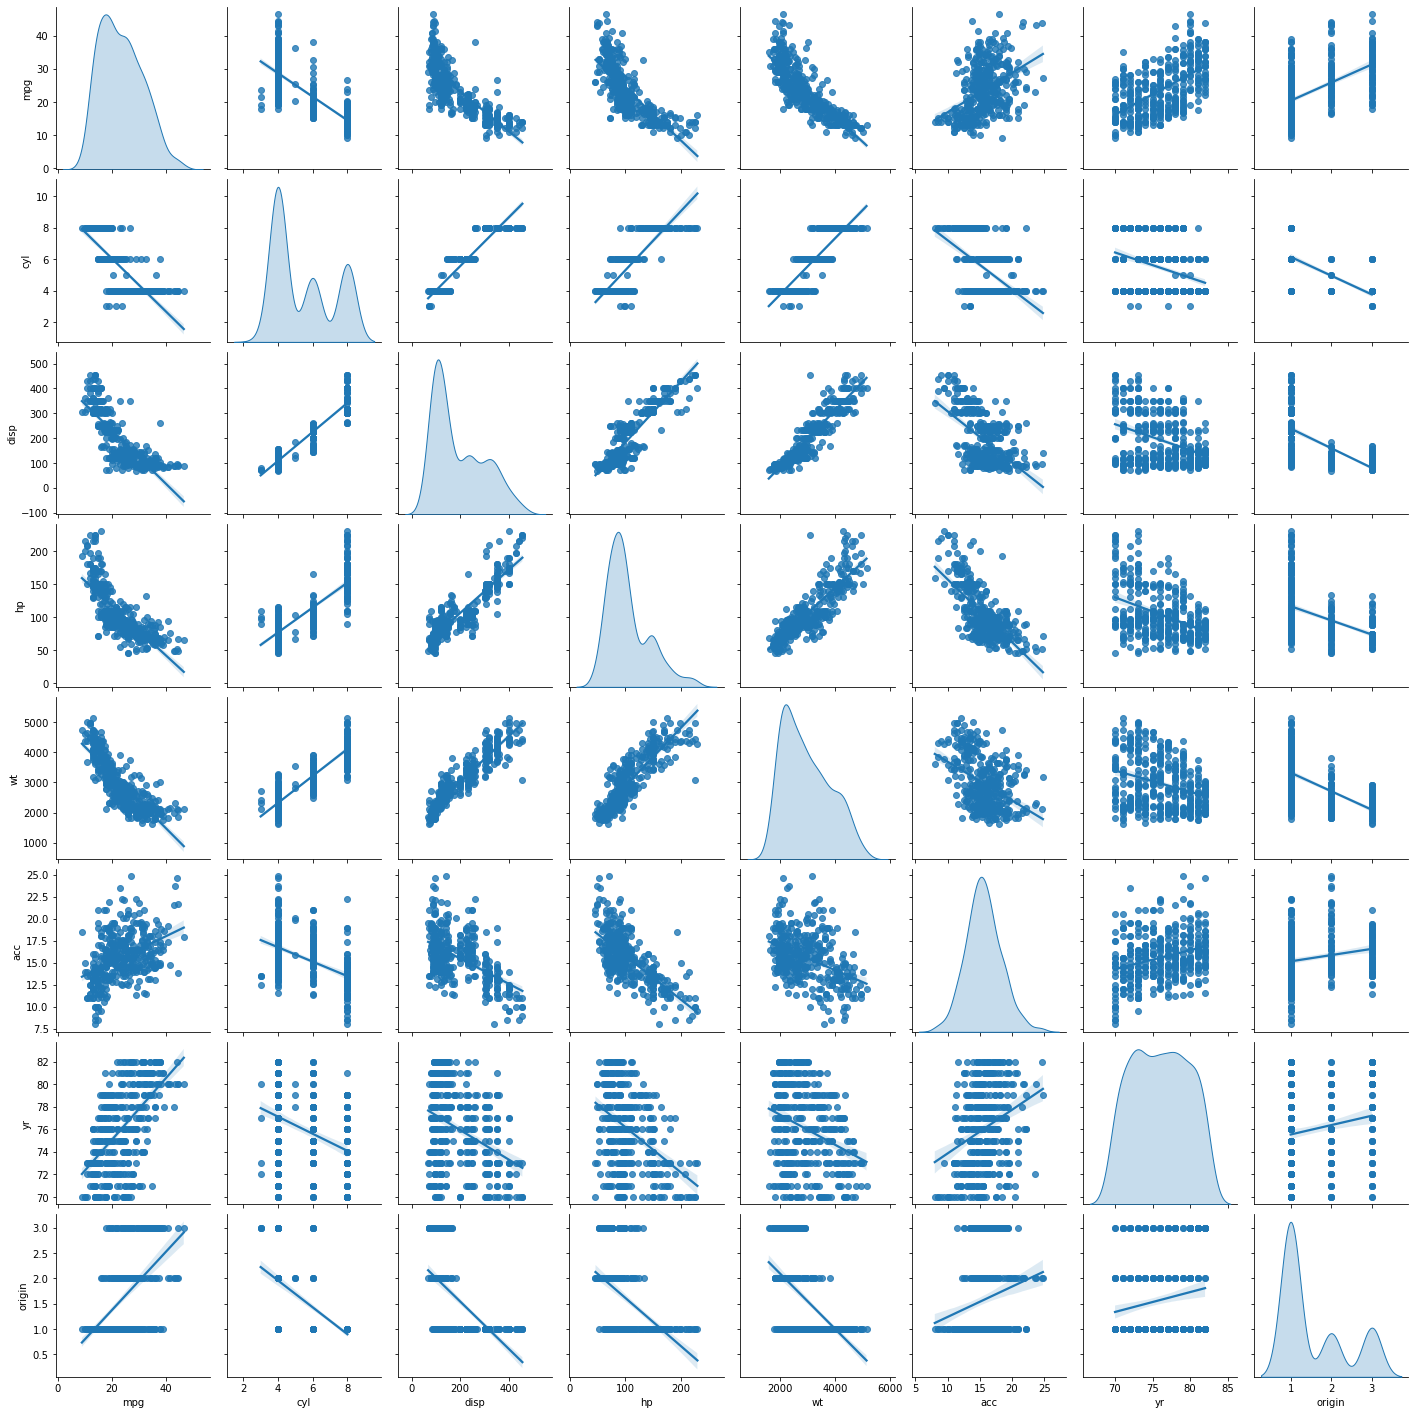

In [19]:
s.pairplot(nu,diag_kind='kde',kind='reg')

In [20]:
print('disp,hp,wt,mpg,origin,cyl are right skewed , acc is normally distributed & yr is uniformally distributed. There is lot of multi collinearity. There is strong negative relationship b/w mpg & cyl,mpg & disp,mpg & hp,mpg & wt,acc & disp,acc & hp,acc & wt, cyl & acc , cyl & origin , cyl & yr , disp & yr, disp & origin, hp & yr , hp & origin, wt & yr , wt & origin. There is strong positive relationship b/w acc & mpg,disp & hp,disp & wt,hp & wt, mpg & yr , mpg & origin, cyl & disp, cyl & hp , cyl & wt , acc & yr , acc & origin, yr & origin. ')

disp,hp,wt,mpg,origin,cyl are right skewed , acc is normally distributed & yr is uniformally distributed. There is lot of multi collinearity. There is strong negative relationship b/w mpg & cyl,mpg & disp,mpg & hp,mpg & wt,acc & disp,acc & hp,acc & wt, cyl & acc , cyl & origin , cyl & yr , disp & yr, disp & origin, hp & yr , hp & origin, wt & yr , wt & origin. There is strong positive relationship b/w acc & mpg,disp & hp,disp & wt,hp & wt, mpg & yr , mpg & origin, cyl & disp, cyl & hp , cyl & wt , acc & yr , acc & origin, yr & origin. 


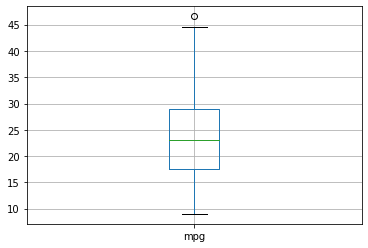

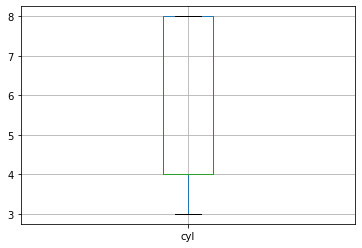

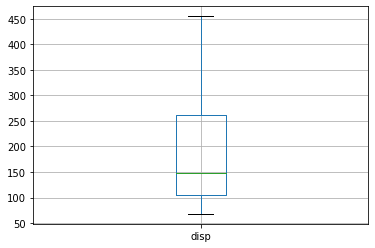

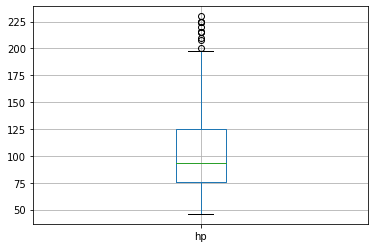

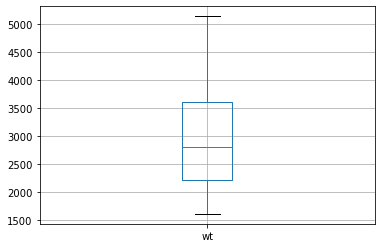

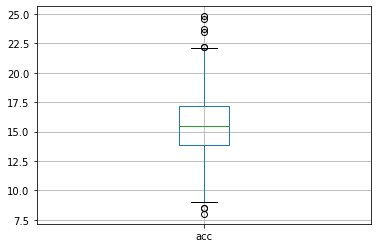

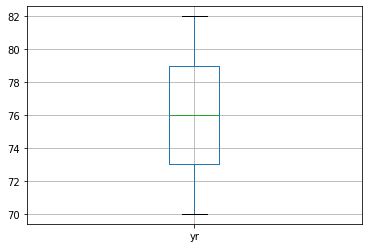

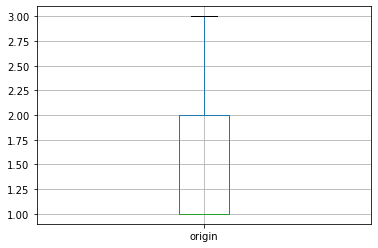

In [21]:
for i in range(0,len(d.columns.to_list())-1):
    d.boxplot(d.columns[i])
    m.show()

In [22]:
d['hp']=d['hp'].clip(upper=d['hp'].quantile(.97))
# d['acc']=d['acc'].clip(lower=d['hp'].quantile(.00000000000000000000000001),upper=d['hp'].quantile(.9999999999999999999999999))

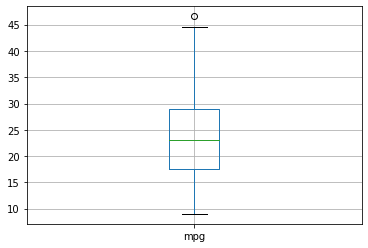

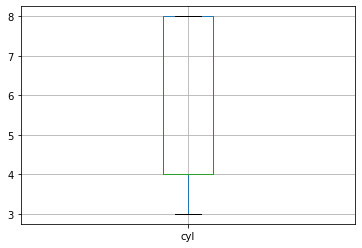

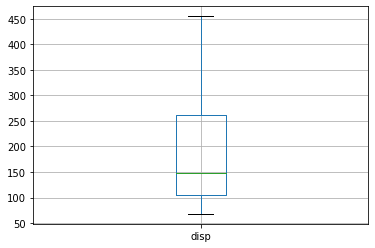

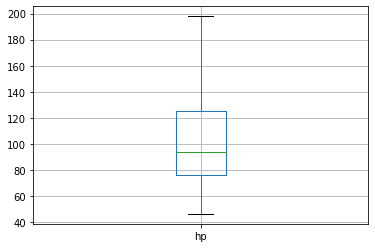

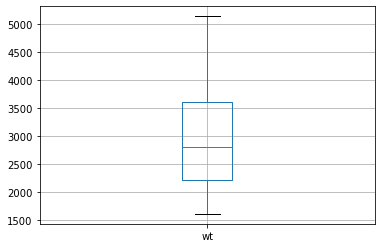

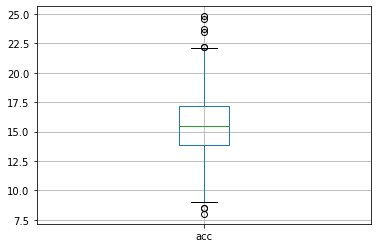

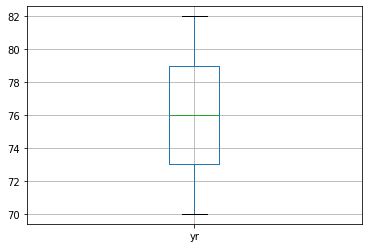

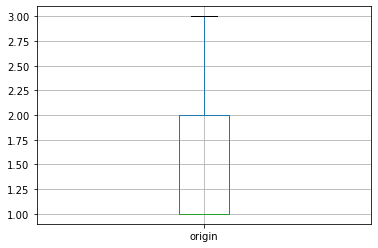

In [23]:
for i in range(0,len(d.columns.to_list())-1):
    d.boxplot(d.columns[i])
    m.show()

In [24]:
from scipy.stats import zscore
nu=nu.apply(zscore)
from sklearn.cluster import KMeans
a=[]
for i in range(2,6):
    mo=KMeans(n_clusters=i)
    mo.fit(nu)
    a.append(mo.inertia_)

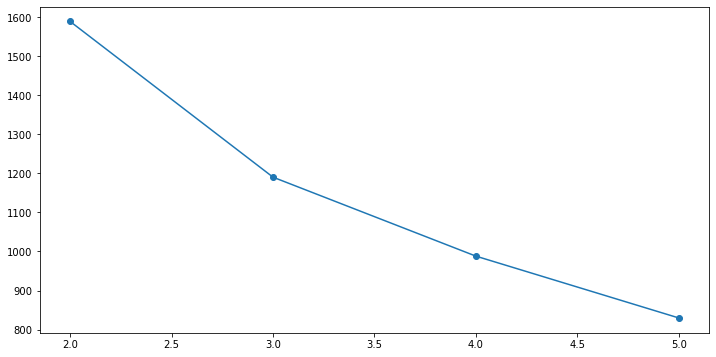

In [25]:
r=range(2,6)
m.figure(figsize=(12,6))
m.plot(r,a,marker='o')

In [26]:
print('optimal no of clusters = 3')

optimal no of clusters = 3


In [27]:
print('the difference b/w Kmeans & hirearchical clustering is that in hirearchical clustering we can get know the clusters within clusters which is not possible with Kmeans')

the difference b/w Kmeans & hirearchical clustering is that in hirearchical clustering we can get know the clusters within clusters which is not possible with Kmeans


In [28]:
print('the optimal no of clusters = 3 as we can see from the elbow plot that the drop in inertia from 2 to 3 clusters is a lot & there after not much. dataset might contain information of 3 differnt types of cars like small,large,hatchback,sedan which may have diff characteristics leading to the formation of clusters')

the optimal no of clusters = 3 as we can see from the elbow plot that the drop in inertia from 2 to 3 clusters is a lot & there after not much. dataset might contain information of 3 differnt types of cars like small,large,hatchback,sedan which may have diff characteristics leading to the formation of clusters


In [29]:
mo=KMeans(n_clusters=3)
mo.fit(nu)
nu['c']=mo.labels_
from sklearn.linear_model import LinearRegression
mo=LinearRegression()
x=nu[nu['c']==0].drop(columns=['mpg','c'],axis=1)
y=nu[nu['c']==0]['mpg']
mo.fit(x,y)
mo.coef_

array([-1.02506866e-01,  9.70832480e-02, -1.21986778e-01, -2.30422220e-01,
       -6.93244069e-02,  1.87695357e-01, -2.13950980e-30])

In [30]:
d=nu
mo.fit(d[d['c']==1].drop(columns=['mpg','c'],axis=1),d[d['c']==1]['mpg'])
mo.coef_

array([-0.05484896,  0.0042353 , -0.2439936 , -0.50034589, -0.06398786,
        0.28929364, -0.07924848])

In [31]:
mo.fit(d[d['c']==2].drop(columns=['mpg','c'],axis=1),d[d['c']==2]['mpg'])
mo.coef_

array([ 0.17194838,  0.09556786, -0.07295419, -0.90398275,  0.16184103,
        0.47521938, -0.03950137])

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


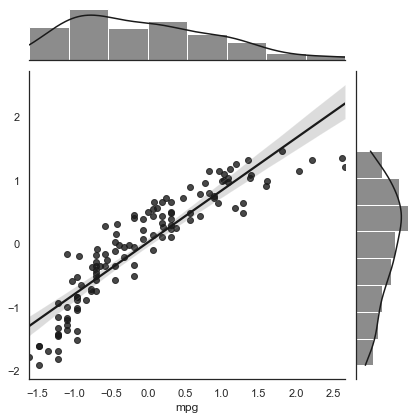

In [32]:
# m.scatter(d[d['c']==0],d[d['c']==1],d[d['c']==2],c='black',s=7)
from sklearn.model_selection import train_test_split
xt,xte,yt,yte=train_test_split(d.drop(columns=['mpg','c'],axis=1),d['mpg'],test_size=.3)
mo.fit(xt,yt)
yp=mo.predict(xte)
s.set(style='darkgrid',color_codes=True)
with s.axes_style('white'):
    s.jointplot(yte,yp,kind='reg',color='k')

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


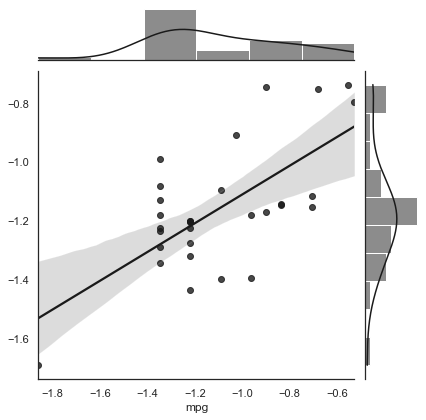

In [33]:
x=d[d['c']==0].drop(columns=['mpg','c'],axis=1)
xt,xte,yt,yte=train_test_split(x,d[d['c']==0]['mpg'],test_size=.3)
mo.fit(xt,yt)
yp=mo.predict(xte)
s.set(style='darkgrid',color_codes=True)
with s.axes_style('white'):
    s.jointplot(yte,yp,kind='reg',color='k')

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


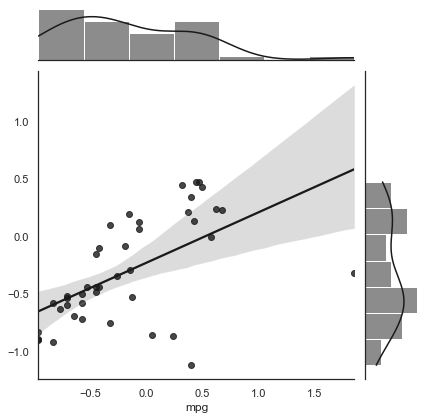

In [34]:
x=d[d['c']==1].drop(columns=['mpg','c'],axis=1)
xt,xte,yt,yte=train_test_split(x,d[d['c']==1]['mpg'],test_size=.3)
mo.fit(xt,yt)
yp=mo.predict(xte)
s.set(style='darkgrid',color_codes=True)
with s.axes_style('white'):
    s.jointplot(yte,yp,kind='reg',color='k')

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


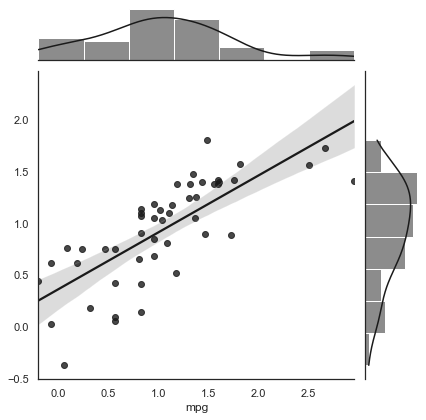

In [35]:
x=d[d['c']==2].drop(columns=['mpg','c'],axis=1)
xt,xte,yt,yte=train_test_split(x,d[d['c']==2]['mpg'],test_size=.3)
mo.fit(xt,yt)
yp=mo.predict(xte)
s.set(style='darkgrid',color_codes=True)
with s.axes_style('white'):
    s.jointplot(yte,yp,kind='reg',color='k')

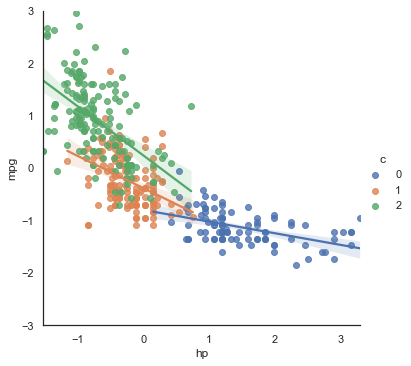

In [36]:
with s.axes_style('white'):
    plo=s.lmplot(x='hp',y='mpg',data=d,hue='c')
plo.set(ylim=(-3,3))

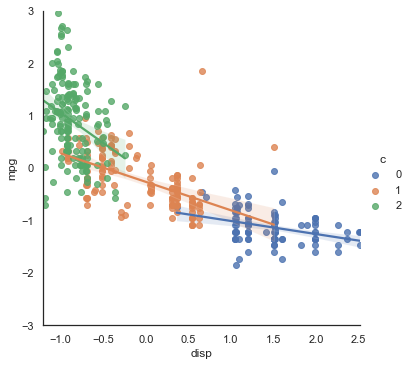

In [37]:
with s.axes_style('white'):
    plo=s.lmplot(x='disp',y='mpg',data=d,hue='c')
plo.set(ylim=(-3,3))

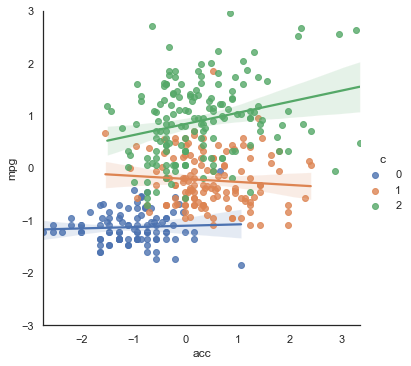

In [38]:
with s.axes_style('white'):
    plo=s.lmplot(x='acc',y='mpg',data=d,hue='c')
plo.set(ylim=(-3,3))

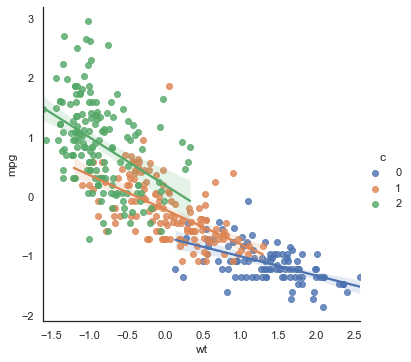

In [39]:
with s.axes_style('white'):
    s.lmplot(x='wt',y='mpg',data=d,hue='c')
plo.set(ylim=(-3,3))

In [40]:
print('as can be seen from above 3 graphs for different clusters different attributes are good predictors of mpg so building different models for different clusters will be helpful in this case as for different models differnt attributes can be chosen instead of using one single model without clustering with all attributes resulting in a poor model')

as can be seen from above 3 graphs for different clusters different attributes are good predictors of mpg so building different models for different clusters will be helpful in this case as for different models differnt attributes can be chosen instead of using one single model without clustering with all attributes resulting in a poor model


In [41]:
print('using different for different clusters will be helpful as each cluster will have its own pattern which can be beautifully modelled using individual linear regression models, like if 2 clusters are seperated far away in the mathematical space, 2 seperate linear models will give better performane & prediction rather than using one linear regression model which will try to model the different patterns of different clusters ')

using different for different clusters will be helpful as each cluster will have its own pattern which can be beautifully modelled using individual linear regression models, like if 2 clusters are seperated far away in the mathematical space, 2 seperate linear models will give better performane & prediction rather than using one linear regression model which will try to model the different patterns of different clusters 


In [42]:
print('clustering is done to avoid mixing of gaussians')

clustering is done to avoid mixing of gaussians
